<a href="https://colab.research.google.com/github/ghisford/Machine_learning/blob/main/Copy_of_loan_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work plan
1. week 1: Select the best model for each cluster.
2. week 2: Build the combined model
3. week 3: Deploy the model
4. week 4: write final report

# Train the model

In [1]:
# !pip install pycaret

In [2]:
# prompt: import 3 csv files and combine them along the same column called 'customer id'

import pandas as pd
df1 = pd.read_csv('traindemographics.csv')
df2 = pd.read_csv('trainperf.csv')
df3 = pd.read_csv('trainprevloans.csv')

df = pd.merge(df1, df2, on='customerid')
df = pd.merge(df, df3, on='customerid')

In [3]:
df.drop_duplicates(inplace=True)


In [4]:
# prompt: remove the _y from the columns ending with a _y and replace it with _prev

df.rename(columns={col: col[:-2] + '_prev' if col.endswith('_y') else col for col in df.columns}, inplace=True)


In [5]:
# prompt: check whether df2['loannumber'] is always greater than or equal to df3['loannumber']. incase it is not always greater, check how many times it is greater than or equal to

is_greater = df['loannumber_x'] > df['loannumber_prev']
always_greater = is_greater.all()
if always_greater:
  print("df2['loannumber'] is always greater than df3['loannumber']")
else:
  greater_count = is_greater.sum()
  print(f"df2['loannumber'] is greater than or equal to df3['loannumber'] {greater_count} times")


df2['loannumber'] is always greater than df3['loannumber']


In [6]:
# prompt: check by how much loannumber_x is greater than loannumber_y on average

diff = df['loannumber_x'] - df['loannumber_prev']
average_diff = diff.mean()
print(f"On average, loannumber_x is {average_diff} greater than loannumber_y")


On average, loannumber_x is 4.201857675711255 greater than loannumber_y


In [7]:
# prompt: check whether loanamount_x  is always equal to loanamount_y

is_equal = df['loanamount_x'] >= df['loanamount_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['loanamount'] is always equal to df3['loanamount']")
else:
  equal_count = is_equal.sum()
  print(f"df2['loanamount'] is greater or equal to df3['loanamount'] {equal_count} times")


df2['loanamount'] is greater or equal to df3['loanamount'] 13240 times


In [8]:
# prompt: create a new column called same_loan_amount. a cell will have 1 if loanamount_x equals to loanamount_y or else it will have 0.

df['same_loan_amount'] = (df['loanamount_x'] == df['loanamount_prev']).astype(int)


In [9]:
df['same_loan_amount'].value_counts()

same_loan_amount
0    8590
1    5083
Name: count, dtype: int64

In [10]:
# prompt: check if termdays_x is equal to termdays_y or how many times it is equal

is_equal = df['termdays_x'] >= df['termdays_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['termdays'] is always equal to df3['termdays']")
else:
  equal_count = is_equal.sum()
  print(f"df2['termdays'] is greater or equal to df3['termdays'] {equal_count} times")


df2['termdays'] is greater or equal to df3['termdays'] 12838 times


In [11]:
# prompt: create a new column called same_termdays. a cell will have 1 if termdays_x equals to termdays_y or else it will have 0.

df['same_termdays'] = (df['termdays_x'] == df['termdays_prev']).astype(int)


In [12]:

df['same_termdays'].value_counts()

same_termdays
1    8236
0    5437
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13673 non-null  object 
 1   birthdate                   13673 non-null  object 
 2   bank_account_type           13673 non-null  object 
 3   longitude_gps               13673 non-null  float64
 4   latitude_gps                13673 non-null  float64
 5   bank_name_clients           13673 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12310 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13673 non-null  int64  
 10  loannumber_x                13673 non-null  int64  
 11  approveddate_x              13673 non-null  object 
 12  creationdate_x              13673 non-null  object 
 13  loanamount_x                13673 no

In [14]:
# prompt: drop the bank_branch_clients, level_of_education_clients, referredby_y,  referredby_y columns from the dataframe permanently

df.drop(['bank_branch_clients', 'level_of_education_clients', ], axis=1, inplace=True)


In [15]:
# prompt: under the "employment_status_clients" column, replace empty cells ie those with Nan values with "unknown" of string datatype

df['employment_status_clients'].fillna('unknown', inplace=True)


In [16]:
# prompt: use the birthdate  column to calculate the age of each client

import datetime

df['birthdate'] = pd.to_datetime(df['birthdate'])
df['today'] = pd.to_datetime(datetime.date.today())
df['age'] = df['today'].dt.year - df['birthdate'].dt.year


# Drop the temporary 'today' column
df.drop('today', axis=1, inplace=True)


In [17]:
# prompt: drop the birthdate column

df.drop('birthdate', axis=1, inplace=True)


In [18]:
df['age'].head()

0    51
1    38
2    37
3    37
4    37
Name: age, dtype: int32

In [19]:
# prompt: slice the dataframe to the loan_number_x and the systemloanid_y as one dataframe

loan_info_df = df[['loannumber_x', 'systemloanid_prev']]
loan_info_df


,loannumber_x,systemloanid_prev
0,2,301943951
1,2,301929966
2,4,301931228
3,4,301895253
4,4,301919784
...,...,...
13688,7,301633289
13689,7,301918076
13690,7,301824314
13691,7,301874438


<Axes: xlabel='loannumber_x'>

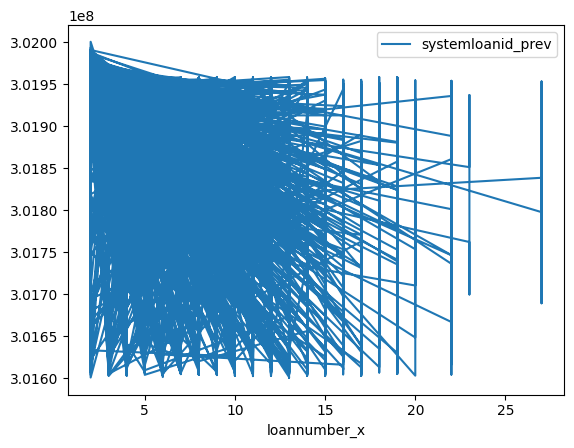

In [20]:
# prompt: draw a line plot loannumber_x' and 'systemloanid_y' columns

loan_info_df.plot.line(x='loannumber_x', y='systemloanid_prev')


In [21]:
# prompt: drop customerid and systemloanid columns

df.drop(columns=['customerid','systemloanid_x','systemloanid_prev', ], inplace=True)


In [22]:
# prompt: convert approveddate and creationdate to datetime datatypes

df['approveddate_x'] = pd.to_datetime(df['approveddate_x'])
df['creationdate_x'] = pd.to_datetime(df['creationdate_x'])
df['approveddate_prev'] = pd.to_datetime(df['approveddate_prev'])
df['creationdate_prev'] = pd.to_datetime(df['creationdate_prev'])

In [23]:

# prompt: create a columm that measures the number of months it took to approve the loan. by subracting creationdate_x from approveddate_x

df['loan_approval_duration_x'] = (df['approveddate_x'] - df['creationdate_x'])
df['loan_approval_duration_prev'] = (df['approveddate_prev'] - df['creationdate_prev'])



In [24]:
# prompt: use the loan_approval_duration_x and loan_approval_duration_y columns to extract only the number of hours and convert them to integers

df['loan_approval_duration_x'] = df['loan_approval_duration_x'] / pd.Timedelta('1 day')
df['loan_approval_duration_x'] = df['loan_approval_duration_x'].astype(float)

df['loan_approval_duration_prev'] = df['loan_approval_duration_prev'] / pd.Timedelta('1 day')
df['loan_approval_duration_prev'] = df['loan_approval_duration_prev'].astype(float)


In [25]:
# prompt: drop the approveddate and creationdate columns

df.drop(columns=['approveddate_x', 'creationdate_x', 'approveddate_prev', 'creationdate_prev'], inplace=True)


In [26]:

# prompt: convert firstduedate and firstrepaiddate to datetime datatypes and subtract the former from the latter

df['firstduedate'] = pd.to_datetime(df['firstduedate'])
df['firstrepaiddate'] = pd.to_datetime(df['firstrepaiddate'])
df['delay_duration'] = df['firstrepaiddate'] - df['firstduedate']


In [27]:
# prompt: convert delay duration to hours to days
# . use the float datatype.

df['delay_duration'] = df['delay_duration'] / pd.Timedelta('1 day')
df['delay_duration'] = df['delay_duration'].astype(float)


In [28]:
df['delay_duration'].value_counts()

delay_duration
 0.000000     51
-4.000000     20
-3.000000     18
-2.000000     16
-1.000000     14
              ..
-13.086910     1
 20.614537     1
 0.662940      1
 0.009873      1
-1.735093      1
Name: count, Length: 13364, dtype: int64

In [29]:
# prompt: convert closeddate and creationdate from the df3 dataframe to datetime datatype

df3['closeddate'] = pd.to_datetime(df3['closeddate'])
df3['creationdate'] = pd.to_datetime(df3['creationdate'])


In [30]:
# prompt: create a loan duration column in the df dataframe using closeddate and creationdate from the df3 dataframe

df['actual_loan_duration'] = df3['closeddate'] - df3['creationdate']



In [31]:
# prompt: convert the actual_loan_duration to days and convert the hours to days. use the float datatype

df['actual_loan_duration'] = df['actual_loan_duration'] / pd.Timedelta('1 day')
df['actual_loan_duration'] = df['actual_loan_duration'].astype(float)


In [32]:
df['actual_loan_duration'].value_counts()

actual_loan_duration
28.865521    2
31.269167    2
23.079745    2
27.902639    2
26.280139    2
            ..
29.295451    1
22.909271    1
22.082187    1
25.739479    1
16.470289    1
Name: count, Length: 13642, dtype: int64

In [33]:
# prompt: drop closeddate, firstduedate, firstrepaiddate

df.drop(columns=['closeddate', 'firstduedate', 'firstrepaiddate'], inplace=True)


In [34]:
df['employment_status_clients'].value_counts()

employment_status_clients
Permanent        9118
Self-Employed    2319
unknown          1363
Student           615
Unemployed        219
Retired            29
Contract           10
Name: count, dtype: int64

In [35]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


# Define the order of categories (most to least viable)
categories = [["Permanent", "Self-Employed", "Contract", "Retired", "Student", "Unemployed", "unknown"]]

# Create the OrdinalEncoder object
encoder = OrdinalEncoder(categories=categories)

# Encode the employment status column
df['employment_status_clients'] = encoder.fit_transform(df[['employment_status_clients']])


In [36]:
df['employment_status_clients'].value_counts()

employment_status_clients
0.0    9118
1.0    2319
6.0    1363
4.0     615
5.0     219
3.0      29
2.0      10
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bank_account_type            13673 non-null  object 
 1   longitude_gps                13673 non-null  float64
 2   latitude_gps                 13673 non-null  float64
 3   bank_name_clients            13673 non-null  object 
 4   employment_status_clients    13673 non-null  float64
 5   loannumber_x                 13673 non-null  int64  
 6   loanamount_x                 13673 non-null  float64
 7   totaldue_x                   13673 non-null  float64
 8   termdays_x                   13673 non-null  int64  
 9   referredby_x                 800 non-null    object 
 10  good_bad_flag                13673 non-null  object 
 11  loannumber_prev              13673 non-null  int64  
 12  loanamount_prev              13673 non-null  float64
 13  totaldue_prev        

In [38]:
# prompt: for refferedby_x and refferedby_y columns, replace empty cells with zero and the contents of the other cells with 1

df['referredby_x'].fillna(0, inplace=True)
df['referredby_prev'].fillna(0, inplace=True)
df.loc[df['referredby_x'] != 0, 'referredby_x'] = 1
df.loc[df['referredby_prev'] != 0, 'referredby_prev'] = 1


In [39]:
# prompt: checked whether referredby_x is always equal to referredby_y

is_equal = df['referredby_x'] == df['referredby_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['referredby'] is always equal to df3['referredby']")
else:
  equal_count = is_equal.sum()
  print(f"df2['referredby'] is equal to df3['referredby'] {equal_count} times")


df2['referredby'] is always equal to df3['referredby']


In [40]:
# prompt: drop referredby_y

df.drop('referredby_prev', axis=1, inplace=True)


In [41]:
# prompt: change referredby_x to integer

df['referredby_x'] = df['referredby_x'].astype('int')


In [42]:
df['referredby_x'].value_counts()

referredby_x
0    12873
1      800
Name: count, dtype: int64

In [43]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


# Define the order of categories (most to least viable)
categories = [['Good', 'Bad']]

# Create the OrdinalEncoder object
encoder = OrdinalEncoder(categories=categories)

# Encode the employment status column
df['good_bad_flag'] = encoder.fit_transform(df[['good_bad_flag']])

# # Initialize LabelEncoders
# label_encoder_acc_type = LabelEncoder()
# label_encoder_bank_name = LabelEncoder()

# # Fit and transform each column separately
# df['bank_account_type'] = label_encoder_acc_type.fit_transform(df[['bank_account_type']])
# df['bank_name_clients'] = label_encoder_bank_name.fit_transform(df[['bank_name_clients']])


In [44]:
from sklearn.preprocessing import  TargetEncoder

T_encoder = TargetEncoder(categories='auto', target_type='binary', smooth='auto', cv=5, shuffle=True, random_state=42)

# Fit and transform the data
df_encoded = T_encoder.fit_transform(df[['bank_account_type', 'bank_name_clients']], df['good_bad_flag'])

# Join the encoded columns back to the original DataFrame
# df = pd.concat([df.drop(['bank_account_type', 'bank_name_clients'], axis=1), df_encoded], axis=1)

df_encoded = pd.DataFrame(df_encoded, columns= ['bank_account_type_enc', 'bank_name_clients_enc'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13673 entries, 0 to 13672
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bank_account_type_enc  13673 non-null  float64
 1   bank_name_clients_enc  13673 non-null  float64
dtypes: float64(2)
memory usage: 213.8 KB


In [45]:
df["bank_account_type_enc"] = df_encoded["bank_account_type_enc"]
df["bank_name_clients_enc"] = df_encoded["bank_name_clients_enc"]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bank_account_type            13673 non-null  object 
 1   longitude_gps                13673 non-null  float64
 2   latitude_gps                 13673 non-null  float64
 3   bank_name_clients            13673 non-null  object 
 4   employment_status_clients    13673 non-null  float64
 5   loannumber_x                 13673 non-null  int64  
 6   loanamount_x                 13673 non-null  float64
 7   totaldue_x                   13673 non-null  float64
 8   termdays_x                   13673 non-null  int64  
 9   referredby_x                 13673 non-null  int64  
 10  good_bad_flag                13673 non-null  float64
 11  loannumber_prev              13673 non-null  int64  
 12  loanamount_prev              13673 non-null  float64
 13  totaldue_prev        

In [47]:
df['good_bad_flag'].isnull().sum()


0

In [48]:
df.drop(columns= ['bank_account_type', "bank_name_clients"], inplace = True)

In [49]:
# # prompt: use one-hot encoding on bank_account_type and bank_name_clients columns

# df = pd.get_dummies(df, columns=['bank_account_type', 'bank_name_clients'])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   longitude_gps                13673 non-null  float64
 1   latitude_gps                 13673 non-null  float64
 2   employment_status_clients    13673 non-null  float64
 3   loannumber_x                 13673 non-null  int64  
 4   loanamount_x                 13673 non-null  float64
 5   totaldue_x                   13673 non-null  float64
 6   termdays_x                   13673 non-null  int64  
 7   referredby_x                 13673 non-null  int64  
 8   good_bad_flag                13673 non-null  float64
 9   loannumber_prev              13673 non-null  int64  
 10  loanamount_prev              13673 non-null  float64
 11  totaldue_prev                13673 non-null  float64
 12  termdays_prev                13673 non-null  int64  
 13  same_loan_amount     

In [51]:

df['good_bad_flag'].value_counts()

good_bad_flag
0.0    11146
1.0     2527
Name: count, dtype: int64

In [52]:
df.dropna(inplace= True)


# Down-sample the target class

In [53]:
# # Separate majority and minority classes
# df_majority = df[df['good_bad_flag'] == 0.0]
# df_minority = df[df['good_bad_flag'] == 1.0]

# # Downsample majority class
# df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# # Combine minority class with downsampled majority class
# df_balanced = pd.concat([df_majority_downsampled, df_minority])

# # Shuffle the dataset to mix rows
# df_balanced = df_balanced.sample(frac=1, random_state=42)

# # Optional: Check the new class distribution
# print(df_balanced['good_bad_flag'].value_counts())


# Up-sample the target class

In [54]:
# prompt: use smote to balance the data points for the 2 categories column
import pandas as pd

from imblearn.over_sampling import SMOTE

X = df.drop('good_bad_flag', axis=1)

y = df['good_bad_flag']

sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X, y)

df_balanced = pd.concat([X_train, y_train], axis=1)

df_balanced['good_bad_flag'].value_counts()


good_bad_flag
0.0    11127
1.0    11127
Name: count, dtype: int64

In [55]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22254 entries, 0 to 22253
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   longitude_gps                22254 non-null  float64
 1   latitude_gps                 22254 non-null  float64
 2   employment_status_clients    22254 non-null  float64
 3   loannumber_x                 22254 non-null  int64  
 4   loanamount_x                 22254 non-null  float64
 5   totaldue_x                   22254 non-null  float64
 6   termdays_x                   22254 non-null  int64  
 7   referredby_x                 22254 non-null  int64  
 8   loannumber_prev              22254 non-null  int64  
 9   loanamount_prev              22254 non-null  float64
 10  totaldue_prev                22254 non-null  float64
 11  termdays_prev                22254 non-null  int64  
 12  same_loan_amount             22254 non-null  int64  
 13  same_termdays   

In [56]:
df_balanced['referredby_x'].value_counts()

referredby_x
0    21326
1      928
Name: count, dtype: int64

In [57]:
df_balanced.drop('referredby_x', axis = 1, inplace= True)

In [58]:
# prompt: check for percentage of missing values

df_balanced.isnull().mean() * 100


longitude_gps                  0.0
latitude_gps                   0.0
employment_status_clients      0.0
loannumber_x                   0.0
loanamount_x                   0.0
totaldue_x                     0.0
termdays_x                     0.0
loannumber_prev                0.0
loanamount_prev                0.0
totaldue_prev                  0.0
termdays_prev                  0.0
same_loan_amount               0.0
same_termdays                  0.0
age                            0.0
loan_approval_duration_x       0.0
loan_approval_duration_prev    0.0
delay_duration                 0.0
actual_loan_duration           0.0
bank_account_type_enc          0.0
bank_name_clients_enc          0.0
good_bad_flag                  0.0
dtype: float64

In [59]:
# prompt: install pandas profiling package

# !pip install pandas-profiling


In [60]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_balanced, title="Profiling Report")
# profile

In [61]:
# prompt: scale the df_balanced dataframe  using the minmax scaler without removing or scaling the target column

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data without the target column
X_train = df_balanced.drop('good_bad_flag', axis= 1)

df_balanced_scaled = scaler.fit_transform(df_balanced)

# Add the target column back to the dataframe
df_balanced_scaled = pd.DataFrame(data=df_balanced_scaled, columns= df_balanced.columns)
df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_prev,loanamount_prev,totaldue_prev,...,same_loan_amount,same_termdays,age,loan_approval_duration_x,loan_approval_duration_prev,delay_duration,actual_loan_duration,bank_account_type_enc,bank_name_clients_enc,good_bad_flag
0,0.451154,0.384383,1.0,0.00,0.0,0.051635,0.2,0.00,0.122807,0.118380,...,1.0,0.0,0.657143,0.000013,0.000480,0.081103,0.044366,0.988420,0.482050,0.0
1,0.451177,0.390004,0.0,0.00,0.0,0.051635,0.2,0.00,0.122807,0.141745,...,1.0,1.0,0.285714,0.000013,0.000488,0.090546,0.078319,0.990959,0.940861,1.0
2,0.460160,0.375197,1.0,0.08,0.0,0.051635,0.2,0.08,0.122807,0.141745,...,1.0,1.0,0.257143,0.000027,0.000037,0.085463,0.137753,0.994498,0.552690,0.0
3,0.460160,0.375197,1.0,0.08,0.0,0.051635,0.2,0.00,0.122807,0.118380,...,1.0,0.0,0.257143,0.000027,0.000140,0.093613,0.037521,0.988420,0.631398,0.0
4,0.460160,0.375197,1.0,0.08,0.0,0.051635,0.2,0.04,0.122807,0.118380,...,1.0,0.0,0.257143,0.000027,0.000037,0.072508,0.072162,1.000000,0.625668,0.0


In [62]:
# prompt: scale data using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data without the target column
X_train = df_balanced.drop('good_bad_flag', axis= 1)

df_balanced_scaled = scaler.fit_transform(df_balanced)

# Add the target column back to the dataframe
df_balanced_scaled = pd.DataFrame(data=df_balanced_scaled, columns= df_balanced.columns)
df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_prev,loanamount_prev,totaldue_prev,...,same_loan_amount,same_termdays,age,loan_approval_duration_x,loan_approval_duration_prev,delay_duration,actual_loan_duration,bank_account_type_enc,bank_name_clients_enc,good_bad_flag
0,-0.163663,-0.233901,2.492671,-1.385104,-1.151791,-1.129592,-0.214561,-0.915356,-0.661936,-0.739672,...,1.195496,-1.239382,1.975776,-0.054551,-0.050848,0.070429,-0.557384,0.815591,-0.114771,-1.0
1,-0.162817,-0.053063,-0.562291,-1.385104,-1.151791,-1.129592,-0.214561,-0.915356,-0.661936,-0.592219,...,1.195496,0.806854,-0.233521,-0.054551,-0.050578,0.395154,0.470973,0.826379,3.208678,1.0
2,0.158175,-0.529409,2.492671,-0.919420,-1.151791,-1.129592,-0.214561,-0.280212,-0.661936,-0.592219,...,1.195496,0.806854,-0.403467,-0.053571,-0.067083,0.220373,2.271083,0.841417,0.396920,-1.0
3,0.158175,-0.529409,2.492671,-0.919420,-1.151791,-1.129592,-0.214561,-0.915356,-0.661936,-0.739672,...,1.195496,-1.239382,-0.403467,-0.053571,-0.063295,0.500627,-0.764700,0.815591,0.967045,-1.0
4,0.158175,-0.529409,2.492671,-0.919420,-1.151791,-1.129592,-0.214561,-0.597784,-0.661936,-0.739672,...,1.195496,-1.239382,-0.403467,-0.053571,-0.067083,-0.225138,0.284480,0.864796,0.925540,-1.0


In [63]:
# # prompt: scale the df_balanced dataframe  using the minmax scaler without removing or scaling the target column

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))

# # Scale the data without the target column
# X_train = df_balanced.drop('good_bad_flag', axis= 1)

# df_balanced_scaled = scaler.fit_transform(df_balanced)

# # Add the target column back to the dataframe
# df_balanced_scaled = pd.DataFrame(data=df_balanced_scaled, columns= df_balanced.columns)
# df_balanced_scaled.head()


In [64]:
df_balanced_scaled.isnull().sum()

longitude_gps                  0
latitude_gps                   0
employment_status_clients      0
loannumber_x                   0
loanamount_x                   0
totaldue_x                     0
termdays_x                     0
loannumber_prev                0
loanamount_prev                0
totaldue_prev                  0
termdays_prev                  0
same_loan_amount               0
same_termdays                  0
age                            0
loan_approval_duration_x       0
loan_approval_duration_prev    0
delay_duration                 0
actual_loan_duration           0
bank_account_type_enc          0
bank_name_clients_enc          0
good_bad_flag                  0
dtype: int64

In [65]:
df_balanced_scaled['good_bad_flag'].value_counts()

good_bad_flag
-1.0    11127
 1.0    11127
Name: count, dtype: int64

In [66]:
# prompt: create a new feature from loanamount and totaldue using the concept of PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_balanced_scaled['loanamount_totaldue_pca_x'] = pca.fit_transform(df_balanced_scaled[['loanamount_x', 'totaldue_x']])
df_balanced_scaled['loanamount_totaldue_pca_prev'] = pca.fit_transform(df_balanced_scaled[['loanamount_prev', 'totaldue_prev']])

df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_prev,loanamount_prev,totaldue_prev,...,age,loan_approval_duration_x,loan_approval_duration_prev,delay_duration,actual_loan_duration,bank_account_type_enc,bank_name_clients_enc,good_bad_flag,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev
0,-0.163663,-0.233901,2.492671,-1.385104,-1.151791,-1.129592,-0.214561,-0.915356,-0.661936,-0.739672,...,1.975776,-0.054551,-0.050848,0.070429,-0.557384,0.815591,-0.114771,-1.0,-1.613181,-0.991087
1,-0.162817,-0.053063,-0.562291,-1.385104,-1.151791,-1.129592,-0.214561,-0.915356,-0.661936,-0.592219,...,-0.233521,-0.054551,-0.050578,0.395154,0.470973,0.826379,3.208678,1.0,-1.613181,-0.886822
2,0.158175,-0.529409,2.492671,-0.919420,-1.151791,-1.129592,-0.214561,-0.280212,-0.661936,-0.592219,...,-0.403467,-0.053571,-0.067083,0.220373,2.271083,0.841417,0.396920,-1.0,-1.613181,-0.886822
3,0.158175,-0.529409,2.492671,-0.919420,-1.151791,-1.129592,-0.214561,-0.915356,-0.661936,-0.739672,...,-0.403467,-0.053571,-0.063295,0.500627,-0.764700,0.815591,0.967045,-1.0,-1.613181,-0.991087
4,0.158175,-0.529409,2.492671,-0.919420,-1.151791,-1.129592,-0.214561,-0.597784,-0.661936,-0.739672,...,-0.403467,-0.053571,-0.067083,-0.225138,0.284480,0.864796,0.925540,-1.0,-1.613181,-0.991087


In [67]:
# prompt: drop loanamount and totaldue columns

df_balanced_scaled.drop(columns=['loanamount_x','loanamount_prev', 'totaldue_x', 'totaldue_prev'], inplace=True)


In [68]:
df_balanced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22254 entries, 0 to 22253
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude_gps                 22254 non-null  float64
 1   latitude_gps                  22254 non-null  float64
 2   employment_status_clients     22254 non-null  float64
 3   loannumber_x                  22254 non-null  float64
 4   termdays_x                    22254 non-null  float64
 5   loannumber_prev               22254 non-null  float64
 6   termdays_prev                 22254 non-null  float64
 7   same_loan_amount              22254 non-null  float64
 8   same_termdays                 22254 non-null  float64
 9   age                           22254 non-null  float64
 10  loan_approval_duration_x      22254 non-null  float64
 11  loan_approval_duration_prev   22254 non-null  float64
 12  delay_duration                22254 non-null  float64
 13  a

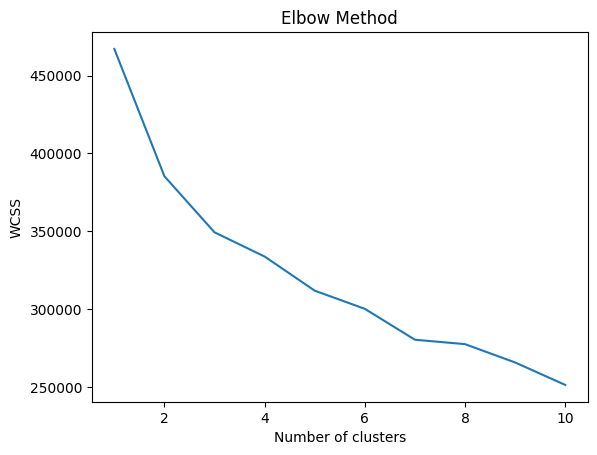

In [69]:
# prompt: use k-means and elbow method to cluster the data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(df_balanced_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [70]:
# prompt: split the data into different clusters. the optimal value for k is 3

kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
df_balanced_scaled['cluster'] = kmeans.fit_predict(df_balanced_scaled)
df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,termdays_x,loannumber_prev,termdays_prev,same_loan_amount,same_termdays,age,loan_approval_duration_x,loan_approval_duration_prev,delay_duration,actual_loan_duration,bank_account_type_enc,bank_name_clients_enc,good_bad_flag,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev,cluster
0,-0.163663,-0.233901,2.492671,-1.385104,-0.214561,-0.915356,-1.062751,1.195496,-1.239382,1.975776,-0.054551,-0.050848,0.070429,-0.557384,0.815591,-0.114771,-1.0,-1.613181,-0.991087,1
1,-0.162817,-0.053063,-0.562291,-1.385104,-0.214561,-0.915356,0.332386,1.195496,0.806854,-0.233521,-0.054551,-0.050578,0.395154,0.470973,0.826379,3.208678,1.0,-1.613181,-0.886822,1
2,0.158175,-0.529409,2.492671,-0.919420,-0.214561,-0.280212,0.332386,1.195496,0.806854,-0.403467,-0.053571,-0.067083,0.220373,2.271083,0.841417,0.396920,-1.0,-1.613181,-0.886822,1
3,0.158175,-0.529409,2.492671,-0.919420,-0.214561,-0.915356,-1.062751,1.195496,-1.239382,-0.403467,-0.053571,-0.063295,0.500627,-0.764700,0.815591,0.967045,-1.0,-1.613181,-0.991087,1
4,0.158175,-0.529409,2.492671,-0.919420,-0.214561,-0.597784,-1.062751,1.195496,-1.239382,-0.403467,-0.053571,-0.067083,-0.225138,0.284480,0.864796,0.925540,-1.0,-1.613181,-0.991087,1


In [71]:
# # prompt: plot the 3 clusters using different  combination of all the columns
# #  using  a scatter plot

# import seaborn as sns

# # Create a scatter plot for each pair of columns
# for i in range(len(df_balanced_scaled.columns)):
#     for j in range(i + 1, len(df_balanced_scaled.columns)):
#         sns.scatterplot(x=df_balanced_scaled.iloc[:, i], y=df_balanced_scaled.iloc[:, j], hue=df_balanced_scaled['cluster'])
#         plt.show()


In [72]:
# prompt: create 3 dataframe each for a different cluster and 3 csv files

df1 = df_balanced_scaled[df_balanced_scaled['cluster'] == 0]
df2 = df_balanced_scaled[df_balanced_scaled['cluster'] == 1]
# df3 = df_balanced_scaled[df_balanced_scaled['cluster'] == 2]

df1.to_csv('cluster1.csv', index=False)
df2.to_csv('cluster2.csv', index=False)
# df3.to_csv('cluster3.csv', index=False)


In [73]:
df_balanced_scaled[["cluster"]].value_counts() / len(df_balanced_scaled) * 100

cluster
1          58.164824
0          41.835176
Name: count, dtype: float64

# Choosing the best model for each cluster

# Model selection for Cluster 1

In [74]:
import pandas as pd

cluster_1 = pd.read_csv("/content/cluster1.csv")

In [75]:
# prompt: drop the cluster column

cluster_1.drop(columns=['cluster'], axis=1, inplace=True)


In [76]:
from pycaret.classification import *

assign = setup(data = cluster_1, target = 'good_bad_flag', session_id=42)

from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

,Description,Value
0,Session id,42
1,Target,good_bad_flag
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(9310, 19)"
5,Transformed data shape,"(9310, 19)"
6,Transformed train set shape,"(6517, 19)"
7,Transformed test set shape,"(2793, 19)"
8,Numeric features,18
9,Preprocess,True


Name                                                          Log Loss
Display Name                                                  Log Loss
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [77]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9891,0.9979,0.9891,0.9893,0.9891,0.9776,0.9778,0.1737,0.3770
lightgbm,Light Gradient Boosting Machine,0.9854,0.9978,0.9854,0.9857,0.9854,0.9701,0.9704,0.2324,2.3420
et,Extra Trees Classifier,0.9801,0.9978,0.9801,0.9803,0.9800,0.9590,0.9593,0.3180,0.6500
rf,Random Forest Classifier,0.9793,0.9983,0.9793,0.9797,0.9792,0.9574,0.9580,0.3303,1.4040
dt,Decision Tree Classifier,0.9489,0.9472,0.9489,0.9490,0.9489,0.8954,0.8955,0.8146,0.0880
gbc,Gradient Boosting Classifier,0.9093,0.9674,0.9093,0.9157,0.9078,0.8104,0.8189,1.4457,3.6110
ada,Ada Boost Classifier,0.8309,0.9015,0.8309,0.8333,0.8285,0.6474,0.6532,2.6958,0.7190
knn,K Neighbors Classifier,0.8051,0.9009,0.8051,0.8229,0.8061,0.6130,0.6252,3.1067,0.1150
ridge,Ridge Classifier,0.5945,0.6199,0.5945,0.5817,0.5672,0.1219,0.1326,6.4654,0.0450
lda,Linear Discriminant Analysis,0.5937,0.6199,0.5937,0.5808,0.5674,0.1214,0.1314,6.4777,0.0460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [78]:
xgboost = create_model('xgboost')
lightgbm = create_model('lightgbm', num_leaves= 31)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
1,0.9847,0.9968,0.9847,0.9848,0.9846,0.9685,0.9687,0.2445
2,0.9969,0.9974,0.9969,0.9969,0.9969,0.9937,0.9937,0.0489
3,0.9939,0.9997,0.9939,0.9939,0.9939,0.9874,0.9875,0.0978
4,0.9831,0.9973,0.9831,0.9836,0.9831,0.9653,0.9659,0.2690
5,0.9831,0.9964,0.9831,0.9834,0.9831,0.9653,0.9657,0.2690
6,0.9847,0.9984,0.9847,0.9849,0.9846,0.9685,0.9688,0.2445
7,0.9846,0.9982,0.9846,0.9849,0.9846,0.9685,0.9688,0.2449
8,0.9923,0.9994,0.9923,0.9924,0.9923,0.9843,0.9843,0.1224


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9939,0.9998,0.9939,0.9939,0.9939,0.9874,0.9875,0.0978
1,0.9847,0.9974,0.9847,0.9848,0.9846,0.9685,0.9687,0.2445
2,0.9954,0.9987,0.9954,0.9954,0.9954,0.9906,0.9906,0.0734
3,0.9847,0.9994,0.9847,0.9847,0.9846,0.9686,0.9686,0.2445
4,0.9785,0.9991,0.9785,0.9791,0.9785,0.9558,0.9565,0.3423
5,0.9770,0.9942,0.9770,0.9776,0.9769,0.9526,0.9534,0.3668
6,0.9831,0.9978,0.9831,0.9834,0.9831,0.9654,0.9658,0.2690
7,0.9862,0.9971,0.9862,0.9864,0.9862,0.9716,0.9719,0.2204
8,0.9862,0.9991,0.9862,0.9864,0.9862,0.9716,0.9719,0.2204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

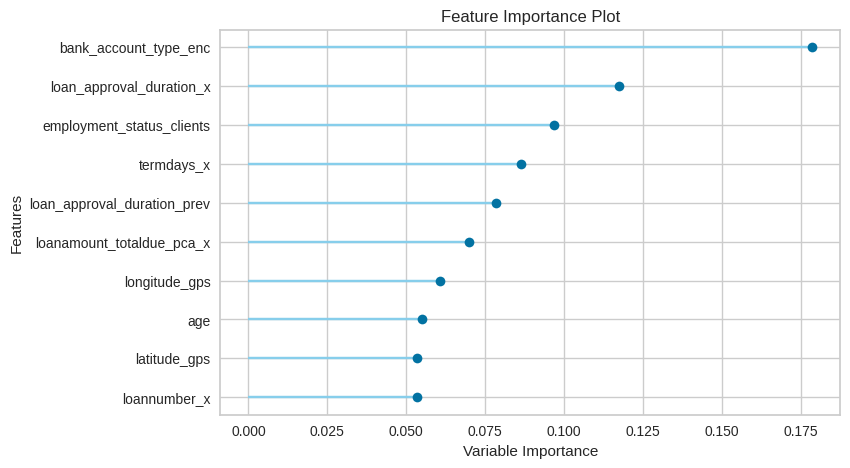

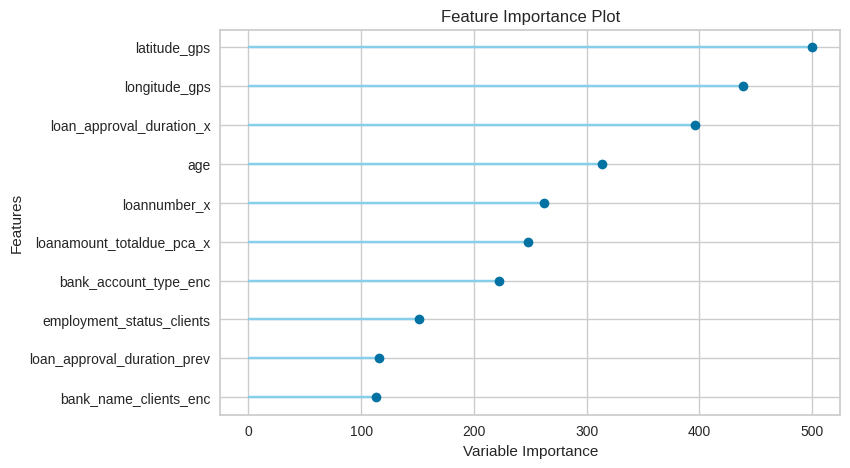

In [79]:
plot_model(xgboost, plot = 'feature')
plot_model(lightgbm, plot = 'feature')


In [80]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12,15,18,21]}

# tune model with custom grid and metric = logloss
tuned_rf_1 = tune_model(xgboost, custom_grid = dt_grid, optimize = 'logloss',fold=10, n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9985,1.0000,0.9985,0.9985,0.9985,0.9969,0.9969,0.0245
1,0.9847,0.9981,0.9847,0.9847,0.9847,0.9686,0.9686,0.2445
2,0.9985,0.9993,0.9985,0.9985,0.9985,0.9969,0.9969,0.0245
3,0.9969,0.9999,0.9969,0.9969,0.9969,0.9937,0.9937,0.0489
4,0.9847,0.9982,0.9847,0.9849,0.9846,0.9685,0.9688,0.2445
5,0.9816,0.9979,0.9816,0.9818,0.9816,0.9622,0.9625,0.2934
6,0.9893,0.9980,0.9893,0.9894,0.9893,0.9780,0.9781,0.1712
7,0.9877,0.9994,0.9877,0.9878,0.9877,0.9748,0.9750,0.1959
8,0.9954,0.9993,0.9954,0.9954,0.9954,0.9906,0.9906,0.0735


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [81]:
evaluate_model(tuned_rf_1)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
final_rf_1 = finalize_model(tuned_rf_1)


In [83]:
save_model(final_rf_1, 'final_rf_1')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['longitude_gps', 'latitude_gps',
                                              'employment_status_clients',
                                              'loannumber_x', 'termdays_x',
                                              'loannumber_prev', 'termdays_prev',
                                              'same_loan_amount',...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                

# Model selection for cluster 2

In [84]:
cluster_2 = pd.read_csv("/content/cluster2.csv")

In [85]:
# prompt: drop the cluster column

cluster_2.drop(columns=['cluster'], axis=1, inplace=True)


In [86]:
from pycaret.classification import *

assign = setup(data = cluster_2, target = 'good_bad_flag', session_id=42)

from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

,Description,Value
0,Session id,42
1,Target,good_bad_flag
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(12944, 19)"
5,Transformed data shape,"(12944, 19)"
6,Transformed train set shape,"(9060, 19)"
7,Transformed test set shape,"(3884, 19)"
8,Numeric features,18
9,Preprocess,True


Name                                                          Log Loss
Display Name                                                  Log Loss
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:50:27
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
et,Extra Trees Classifier,0.9264,0.9807,0.9264,0.9265,0.9263,0.8506,0.8510,1.1737,1.1570
xgboost,Extreme Gradient Boosting,0.9164,0.9738,0.9164,0.9186,0.9166,0.8320,0.8337,1.3321,0.3460
rf,Random Forest Classifier,0.9098,0.9702,0.9098,0.9104,0.9099,0.8180,0.8184,1.4376,2.0890
gbc,Gradient Boosting Classifier,0.8591,0.9306,0.8591,0.8684,0.8594,0.7191,0.7264,2.2471,2.7250
dt,Decision Tree Classifier,0.8213,0.8171,0.8213,0.8213,0.8208,0.6369,0.6377,2.8489,0.1150
ada,Ada Boost Classifier,0.8004,0.8823,0.8004,0.8034,0.8009,0.5991,0.6006,3.1814,0.5630
knn,K Neighbors Classifier,0.7848,0.8616,0.7848,0.7914,0.7804,0.5552,0.5664,3.4313,0.1510
lr,Logistic Regression,0.6162,0.6474,0.6162,0.6124,0.6078,0.2062,0.2109,6.1183,0.0590
lda,Linear Discriminant Analysis,0.6143,0.6422,0.6143,0.6104,0.6052,0.2013,0.2065,6.1482,0.0550
ridge,Ridge Classifier,0.6142,0.6422,0.6142,0.6104,0.6049,0.2009,0.2061,6.1500,0.0580


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
extra_trees_2 = create_model('et')
random_forest_2 = create_model('rf')

In [ ]:
plot_model(extra_trees_2, plot = 'feature')
plot_model(random_forest_2, plot = 'feature')


In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12,15,18,21]}

# tune model with custom grid and metric = logloss
tuned_rf_2 = tune_model(extra_trees_2, custom_grid = dt_grid, optimize = 'logloss',fold=10, n_iter=10)

In [ ]:
final_rf_2 = finalize_model(tuned_rf_2)
save_model(final_rf_2, 'final_rf_2')


# Model Training

In [222]:
# prompt: split the df_balanced_scaled into train and test sets
from sklearn.model_selection import train_test_split

X = df_balanced_scaled.drop(columns= ['good_bad_flag', 'cluster'], axis=1)

y = df_balanced_scaled['good_bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)


In [223]:
# prompt: create an ensemble model with 3 models

from sklearn.ensemble import VotingClassifier

# Define the individual models
model1 = final_rf_1
model2 = final_rf_2


# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('model1', model1),], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('model1',
                              Pipeline(memory=Memory(location=None),
                                       steps=[('label_encoding',
                                               TransformerWrapperWithInverse(exclude=None,
                                                                             include=None,
                                                                             transformer=LabelEncoder())),
                                              ('numerical_imputer',
                                               TransformerWrapper(exclude=None,
                                                                  include=['longitude_gps',
                                                                           'latitude_gps',
                                                                           'employment_status_clients',
                                                                           'loannumber_x',
                                                                           'termdays_x',
                                                                           'loannumber_pr...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=8,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             objective='binary:logistic', ...))],
                                       verbose=False))],
                 flatten_transform=True, n_jobs=None, verbose=False,
                 voting='soft', weights=None)

# Testing the model on test data

In [ ]:
# prompt: import 3 csv files and combine them along the same column called 'customer id'

import pandas as pd
df1 = pd.read_csv('testdemographics.csv')
df2 = pd.read_csv('testperf.csv')
test_df3 = pd.read_csv('testprevloans.csv')

test_df = pd.merge(df1, df2, on='customerid')
test_df = pd.merge(test_df, test_df3, on='customerid')

In [ ]:
customerid = test_df[['customerid']]

In [ ]:
# prompt: remove the _y from the columns ending with a _y and replace it with _prev

test_df.rename(columns={col: col[:-2] + '_prev' if col.endswith('_y') else col for col in test_df.columns}, inplace=True)


In [ ]:
test_df.head()

In [ ]:
# prompt: check whether df2['loannumber'] is always greater than or equal to df3['loannumber']. incase it is not always greater, check how many times it is greater than or equal to

is_greater = test_df['loannumber_x'] > test_df['loannumber_prev']
always_greater = is_greater.all()
if always_greater:
  print("df2['loannumber'] is always greater than df3['loannumber']")
else:
  greater_count = is_greater.sum()
  print(f"df2['loannumber'] is greater than or equal to df3['loannumber'] {greater_count} times")


In [ ]:
# prompt: check by how much loannumber_x is greater than loannumber_y on average

diff = test_df['loannumber_x'] - test_df['loannumber_prev']
average_diff = diff.mean()
print(f"On average, loannumber_x is {average_diff} greater than loannumber_y")


In [ ]:
# prompt: check whether loanamount_x  is always equal to loanamount_y

is_equal = test_df['loanamount_x'] >= test_df['loanamount_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['loanamount'] is always equal to df3['loanamount']")
else:
  equal_count = is_equal.sum()
  print(f"df2['loanamount'] is greater or equal to df3['loanamount'] {equal_count} times")


In [ ]:
# prompt: create a new column called same_loan_amount. a cell will have 1 if loanamount_x equals to loanamount_y or else it will have 0.

test_df['same_loan_amount'] = (test_df['loanamount_x'] == test_df['loanamount_prev']).astype(int)


In [ ]:
test_df['same_loan_amount'].value_counts()

In [ ]:
# prompt: check if termdays_x is equal to termdays_y or how many times it is equal

is_equal = test_df['termdays_x'] >= test_df['termdays_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['termdays'] is always equal to df3['termdays']")
else:
  equal_count = is_equal.sum()
  print(f"df2['termdays'] is greater or equal to df3['termdays'] {equal_count} times")


In [ ]:
# prompt: create a new column called same_termdays. a cell will have 1 if termdays_x equals to termdays_y or else it will have 0.

test_df['same_termdays'] = (test_df['termdays_x'] == test_df['termdays_prev']).astype(int)


In [ ]:
test_df['same_termdays'].value_counts()

In [ ]:
test_df.info()

In [ ]:
# prompt: drop the bank_branch_clients, level_of_education_clients, referredby_y,  referredby_y columns from the dataframe permanently

test_df.drop(['bank_branch_clients', 'level_of_education_clients', ], axis=1, inplace=True)


In [ ]:
# prompt: under the "employment_status_clients" column, replace empty cells ie those with Nan values with "unknown" of string datatype

test_df['employment_status_clients'].fillna('unknown', inplace=True)


In [ ]:
# prompt: use the birthdate  column to calculate the age of each client

import datetime

test_df['birthdate'] = pd.to_datetime(test_df['birthdate'])
test_df['today'] = pd.to_datetime(datetime.date.today())
test_df['age'] = test_df['today'].dt.year - test_df['birthdate'].dt.year


# Drop the temporary 'today' column
test_df.drop('today', axis=1, inplace=True)


In [ ]:
# prompt: drop the birthdate column

test_df.drop('birthdate', axis=1, inplace=True)


In [ ]:
test_df['age'].head()

In [ ]:
# prompt: drop customerid and systemloanid columns

test_df.drop(columns=['customerid','systemloanid_x','systemloanid_prev', ], inplace=True)


In [ ]:
# prompt: convert approveddate and creationdate to datetime datatypes

# df['approveddate_x'] = pd.to_datetime(df['approveddate_x'])
# df['creationdate_x'] = pd.to_datetime(df['creationdate_x'])
# df['approveddate_prev'] = pd.to_datetime(df['approveddate_prev'])
# df['creationdate_prev'] = pd.to_datetime(df['creationdate_prev'])

In [ ]:
test_df.head()

In [ ]:
# prompt: slice the first 2 values of  the strings in the columns: approveddate_x,  creationdate_x,  approveddate_prev, creationdate_prev then convert them into floats

test_df['approveddate_x'] = test_df['approveddate_x'].str[:2].astype(float)
test_df['creationdate_x'] = test_df['creationdate_x'].str[:2].astype(float)
test_df['approveddate_prev'] = pd.to_datetime(test_df['approveddate_prev'])
test_df['creationdate_prev'] = pd.to_datetime(test_df['creationdate_prev'])

In [ ]:
# prompt: create a columm that measures the number of months it took to approve the loan. by subracting creationdate_x from approveddate_x

test_df['loan_approval_duration_x'] = (test_df['approveddate_x'] - test_df['creationdate_x'])
test_df['loan_approval_duration_prev'] = (test_df['approveddate_prev'] - test_df['creationdate_prev'])

In [ ]:
# prompt: use the loan_approval_duration_x and loan_approval_duration_y columns to extract only the number of hours and convert them to integers

test_df['loan_approval_duration_x'] = test_df['loan_approval_duration_x'] /24
test_df['loan_approval_duration_x'] = test_df['loan_approval_duration_x'].astype(float)

test_df['loan_approval_duration_prev'] = test_df['loan_approval_duration_prev'] / pd.Timedelta('1 day')
test_df['loan_approval_duration_prev'] = test_df['loan_approval_duration_prev'].astype(float)


In [ ]:
test_df['loan_approval_duration_prev'].head()

In [ ]:
# prompt: drop the approveddate and creationdate columns

test_df.drop(columns=['approveddate_x', 'creationdate_x', 'approveddate_prev', 'creationdate_prev'], inplace=True)


In [ ]:
# prompt: convert firstduedate and firstrepaiddate to datetime datatypes and subtract the former from the latter

test_df['firstduedate'] = pd.to_datetime(test_df['firstduedate'])
test_df['firstrepaiddate'] = pd.to_datetime(test_df['firstrepaiddate'])
test_df['delay_duration'] = test_df['firstrepaiddate'] - test_df['firstduedate']


In [ ]:
# prompt: convert delay duration to hours to days
# . use the float datatype.

test_df['delay_duration'] = test_df['delay_duration'] / pd.Timedelta('1 day')
test_df['delay_duration'] = test_df['delay_duration'].astype(float)


In [ ]:
test_df['delay_duration'].value_counts()

In [ ]:
# prompt: convert closeddate and creationdate from the df3 dataframe to datetime datatype

test_df3['closeddate'] = pd.to_datetime(test_df3['closeddate'])
test_df3['creationdate'] = pd.to_datetime(test_df3['creationdate'])


In [ ]:
# prompt: create a loan duration column in the df dataframe using closeddate and creationdate from the df3 dataframe

test_df['actual_loan_duration'] = test_df3['closeddate'] - test_df3['creationdate']


In [ ]:
# prompt: convert the actual_loan_duration to days and convert the hours to days. use the float datatype

test_df['actual_loan_duration'] = test_df['actual_loan_duration'] / pd.Timedelta('1 day')
test_df['actual_loan_duration'] = test_df['actual_loan_duration'].astype(float)

In [ ]:
test_df['actual_loan_duration'].value_counts()

In [ ]:
# prompt: drop closeddate, firstduedate, firstrepaiddate

test_df.drop(columns=['closeddate', 'firstduedate', 'firstrepaiddate'], inplace=True)


In [ ]:
# prompt: replace nan values in the employement _status_clients with "unknown"

test_df['employment_status_clients'].fillna('unknown', inplace=True)


In [ ]:
test_df['employment_status_clients'].value_counts()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


# Define the order of categories (most to least viable)
categories = [["Permanent", "Self-Employed", "Contract", "Retired", "Student", "Unemployed", "unknown"]]

# Create the OrdinalEncoder object
encoder = OrdinalEncoder(categories=categories)

# Encode the employment status column
test_df['employment_status_clients'] = encoder.fit_transform(test_df[['employment_status_clients']])


In [ ]:
test_df['employment_status_clients'].value_counts()

In [ ]:
test_df.info()

In [ ]:
# prompt: for refferedby_x and refferedby_y columns, replace empty cells with zero and the contents of the other cells with 1

test_df['referredby_x'].fillna(0, inplace=True)
test_df['referredby_prev'].fillna(0, inplace=True)
test_df.loc[test_df['referredby_x'] != 0, 'referredby_x'] = 1
test_df.loc[test_df['referredby_prev'] != 0, 'referredby_prev'] = 1


In [ ]:
# prompt: checked whether referredby_x is always equal to referredby_y

is_equal = test_df['referredby_x'] == test_df['referredby_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['referredby'] is always equal to df3['referredby']")
else:
  equal_count = is_equal.sum()
  print(f"df2['referredby'] is equal to df3['referredby'] {equal_count} times")


In [ ]:
# prompt: drop referredby_y

test_df.drop('referredby_prev', axis=1, inplace=True)


In [ ]:
# prompt: change referredby_x to integer

test_df['referredby_x'] = test_df['referredby_x'].astype('int')


In [ ]:
test_df['referredby_x'].value_counts()

In [ ]:
import pandas as pd
from sklearn.preprocessing import  LabelEncoder


# Initialize LabelEncoders
label_encoder_acc_type = LabelEncoder()
label_encoder_bank_name = LabelEncoder()

# Fit and transform each column separately
# test_df['bank_account_type'] = label_encoder_acc_type.fit_transform(test_df[['bank_account_type']])
# test_df['bank_name_clients'] = label_encoder_bank_name.fit_transform(test_df[['bank_name_clients']])



In [ ]:
test_df.info()

In [ ]:
from sklearn.preprocessing import  TargetEncoder

# T_encoder = TargetEncoder(categories='auto', target_type='binary', smooth='auto', cv=5, shuffle=True, random_state=42)

# Fit and transform the data
test_encoded = T_encoder.transform(test_df[['bank_account_type', 'bank_name_clients']])

# Join the encoded columns back to the original DataFrame
# df = pd.concat([df.drop(['bank_account_type', 'bank_name_clients'], axis=1), df_encoded], axis=1)

test_encoded = pd.DataFrame(test_encoded, columns= ['bank_account_type_enc', 'bank_name_clients_enc'])
test_encoded.info()

In [ ]:
test_df["bank_account_type_enc"] = test_encoded["bank_account_type_enc"]
test_df["bank_name_clients_enc"] = test_encoded["bank_name_clients_enc"]

In [ ]:
test_df.drop(columns= ['bank_account_type', "bank_name_clients"], inplace = True)

In [ ]:
# prompt: check for percentage of missing values

test_df.isnull().mean() * 100

In [ ]:
# prompt: scale the df_balanced dataframe  using the minmax scaler without removing or scaling the target column

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data without the target column
test_df_scaled = scaler.fit_transform(test_df)

# Add the target column back to the dataframe
test_df_scaled = pd.DataFrame(data=test_df_scaled, columns=test_df.columns)

test_df_scaled.head()


In [ ]:
# prompt: create a new feature from loanamount and totaldue using the concept of PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
test_df_scaled['loanamount_totaldue_pca_x'] = pca.fit_transform(test_df_scaled[['loanamount_x', 'totaldue_x']])
test_df_scaled['loanamount_totaldue_pca_prev'] = pca.fit_transform(test_df_scaled[['loanamount_prev', 'totaldue_prev']])

test_df_scaled.head()


In [ ]:
# prompt: drop loanamount and totaldue columns

test_df_scaled.drop(columns=['loanamount_x','loanamount_prev', 'totaldue_x', 'totaldue_prev'], inplace=True)


In [ ]:
test_duplicates = test_df_scaled[test_df_scaled.duplicated()]
test_duplicates

In [ ]:
test_df_scaled.drop('referredby_x', axis= 1, inplace= True)

In [ ]:
test_df_scaled.info()

# After evaluation

In [225]:
predictions = ensemble_model.predict(test_df_scaled)

In [226]:
# prompt: convert predictions into a dataframe

predictions_df = pd.DataFrame(predictions, columns=['Good_Bad_flag'])


In [227]:
# prompt: replace all the -1 under the Good_bad_flag column of predictions_df dataframe with zero permanently

predictions_df['Good_Bad_flag'] = predictions_df['Good_Bad_flag'].replace(-1, 0)


In [228]:
predictions_df.value_counts()

Good_Bad_flag
1.0              950
0.0              655
Name: count, dtype: int64

In [229]:
duplicates = test_df_scaled[test_df_scaled.duplicated()]
duplicates

,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,termdays_x,loannumber_prev,termdays_prev,same_loan_amount,same_termdays,age,loan_approval_duration_x,loan_approval_duration_prev,delay_duration,actual_loan_duration,bank_account_type_enc,bank_name_clients_enc,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev


In [230]:
# prompt: concatenate customer id to the front the predicions_df
import numpy as np

final_predictions = pd.concat((customerid, predictions_df), axis=1)
final_predictions


,customerid,Good_Bad_flag
0,8a858f305c8dd672015c93b1db645db4,0.0
1,8a858fde56eb02280156eb6dafc128ac,0.0
2,8a858fde56eb02280156eb6dafc128ac,0.0
3,8a858fde56eb02280156eb6dafc128ac,0.0
4,8a858fde56eb02280156eb6dafc128ac,0.0
...,...,...
1600,8a858e675b00c831015b06776ce75e69,1.0
1601,8a858e675b00c831015b06776ce75e69,1.0
1602,8a858e675b00c831015b06776ce75e69,1.0
1603,8a858e675b00c831015b06776ce75e69,1.0


# Create submission file

In [231]:
final_predictions = pd.DataFrame(final_predictions, columns=['customerid', 'Good_Bad_flag'])


In [232]:
sample_df = pd.read_csv("/content/SampleSubmission.csv")
sample_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     1450 non-null   object
 1   Good_Bad_flag  1450 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.8+ KB


In [233]:
# prompt: concatenate submit_df and sample_df

final_submission = pd.concat([sample_df, final_predictions], axis=0)
final_submission.to_csv("submit_14.csv", index= False)

In [234]:
final_predictions.value_counts()

customerid                        Good_Bad_flag
8a8588d653a915270153ab10232e304f  1.0              18
8a858f03582604ff01582a09d5a32c12  1.0              16
8a858e69566ae5b801568fe0bb8a4fd0  1.0              15
8a85896653f0fed20154065bbe063ff7  1.0              15
8a858899538ddb8e01539042374a1e26  1.0              15
                                                   ..
8a858f1f5c834d4f015c872619d66fd2  0.0               1
8a858f235b8bf5bc015b8bfee8ee084c  0.0               1
8a858f255cb1710a015cc3e7f142101c  1.0               1
8a858f265c2187bd015c21d5f78413fc  0.0               1
8aab10f748cf78ff0148d11fac1447a6  0.0               1
Name: count, Length: 460, dtype: int64

In [235]:
test_df.head()

,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,loannumber_prev,loanamount_prev,...,termdays_prev,same_loan_amount,same_termdays,age,loan_approval_duration_x,loan_approval_duration_prev,delay_duration,actual_loan_duration,bank_account_type_enc,bank_name_clients_enc
0,5.296628,7.593965,0.0,2,10000,11500.0,15,0,1,10000.0,...,30,1,0,48,0.000000,0.042442,-0.282222,30.602315,0.221078,0.138353
1,6.354624,4.949031,1.0,14,40000,44000.0,30,0,10,40000.0,...,30,1,1,42,0.041667,0.041748,0.314595,25.829236,0.221078,0.187887
2,6.354624,4.949031,1.0,14,40000,44000.0,30,0,12,40000.0,...,30,1,1,42,0.041667,0.041748,0.665556,28.636204,0.221078,0.187887
3,6.354624,4.949031,1.0,14,40000,44000.0,30,0,7,30000.0,...,30,0,1,42,0.041667,0.041782,0.432847,31.921481,0.221078,0.187887
4,6.354624,4.949031,1.0,14,40000,44000.0,30,0,6,30000.0,...,15,0,0,42,0.041667,0.041782,-4.646412,16.659653,0.221078,0.187887
